# Heart Disease ML Project

## Project Overview

Predicting Heart Disease Using Machine Learning

### Author

Grant Novota

### Problem Description

Heart disease remains one of the leading causes of death globally. Early detection is crucial for effective treatment and management. This project aims to use machine learning to predict the presence of heart disease in patients based on a range of medical attributes. By applying various classification algorithms, we seek to develop a model that can accurately identify individuals at risk, thereby aiding in early diagnosis and potentially saving lives.

### Goal

The primary goal of this project is to develop a predictive model with a high degree of accuracy in detecting the presence of heart disease. This involves:

* Understanding the relationship between various medical attributes and the presence of heart disease.
* Comparing the performance of multiple machine learning algorithms to find the most suitable one for our task.
* Evaluating the model using appropriate metrics to ensure its reliability and effectiveness in a real-world setting.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's start by importing the data, which can be done importing a python library, and exploring the basic structure of the features. Then check for any missing values explicitly.

First 5 rows of the features dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

First 5 rows of the target dataset:
   num
0    0
1    2
2    1
3    0
4    0

Features Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 no

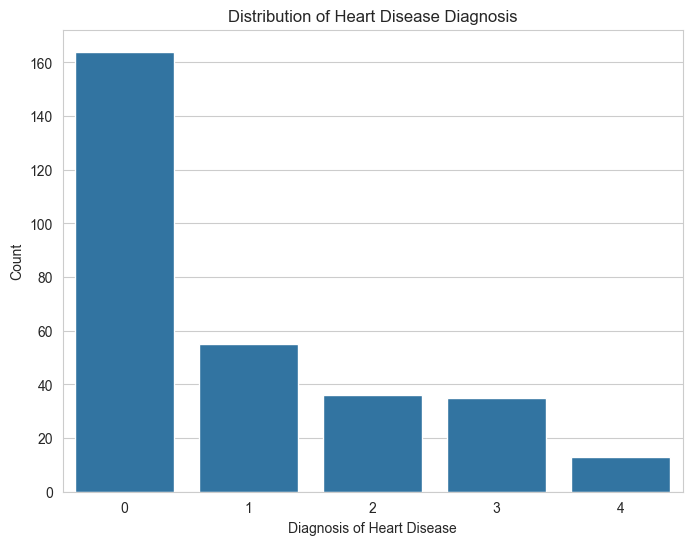

In [2]:
# Import dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
# print(heart_disease.metadata) 
  
# variable information 
# print(heart_disease.variables)

# Ensure that matplotlib plots are displayed inline in the Jupyter Notebook
%matplotlib inline

# Setting the visualisation styles for seaborn
sns.set_style("whitegrid")

# Display the first few rows of the feature dataframe to understand its structure
print("First 5 rows of the features dataset:")
print(X.head())

# Display the first few rows of the target dataframe
print("\nFirst 5 rows of the target dataset:")
print(y.head())

# Display basic information about the features dataset
print("\nFeatures Dataset Info:")
X.info()

# Basic statistical description of the numerical features in the dataset
print("\nStatistical Summary of Features:")
print(X.describe())

# Checking for missing values in the features dataset
print("\nMissing values in each feature column:")
print(X.isnull().sum())

# Checking for missing values in the target dataset
print("\nMissing values in the target column:")
print(y.isnull().sum())

# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y['num'])
plt.title('Distribution of Heart Disease Diagnosis')
plt.xlabel('Diagnosis of Heart Disease')
plt.ylabel('Count')
plt.show()

Given the exploration results, we observe that the dataset consists of 303 instances with 13 features each. All features are numerical, with both integer and float types present. The target variable, num, indicates the presence of heart disease and shows no missing values. However, we have identified missing values in the ca and thal features, which we will need to address as part of our data cleaning process.

## Data Cleaning

The data cleaning process will involve handling missing values for the ca and thal features. Given the small number of missing values (4 in ca and 2 in thal), one straightforward approach is to impute these missing values. For this project, we'll use the median values of these columns for imputation, as this method is robust to outliers and does not assume a normal distribution of data.

After handling missing values, we will also check for any outliers or anomalies in the dataset that may affect our model's performance.

In [3]:
# Impute missing values using the median
X['ca'].fillna(X['ca'].median(), inplace=True)
X['thal'].fillna(X['thal'].median(), inplace=True)

# Check again for missing values to confirm
print("\nMissing values after imputation:")
print(X.isnull().sum())


Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


C:\Users\gtnov\AppData\Local\Temp\ipykernel_24596\4060859806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['ca'].fillna(X['ca'].median(), inplace=True)
C:\Users\gtnov\AppData\Local\Temp\ipykernel_24596\4060859806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ca'].fillna(X['ca'].median(), inplace=True)
C:\Users\gtnov\AppData\Lo

### Data Preparation for Modeling

Before moving to model building, it's crucial to split the data into training and testing sets. This ensures that we have a way to validate the performance of our model on unseen data. Additionally, depending on the model chosen, we may need to scale the features since models like SVM and KNN are sensitive to the scale of the data.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation for modeling completed.")

Data preparation for modeling completed.


With the data now prepared for modeling: missing values addressed and the data split into training and testing sets, with scaling applied. It is time to proceed to the model building phase:

1. Selecting Models: choose a few ML models that are well-suited for binary classification problems. Given the nature of the dataset, logistic regression, decision trees, random forests, and support vector machines are good starting points.
2. Training Models: Fit the selected models to the training data.
3. Evaluating Models: Use the test set to evaluate each model's performance, focusing on metrics relevant to binary classification tasks.
4. Selecting the Best Model: Compare the models based on the evaluation metrics and select the best-performing model.
5. Fine Tuning: fine tune the hyperparameters of the chosen model to further improve performance.

### Model Building and Evaluation

We'll start by training and evaluating three models: Logistic Regression, Random Forest, and Support Vector Machine.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize the models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)

# Train the models
logreg.fit(X_train_scaled, y_train['num'])
rf.fit(X_train_scaled, y_train['num'])
svc.fit(X_train_scaled, y_train['num'])

# Predictions
logreg_preds = logreg.predict(X_test_scaled)
rf_preds = rf.predict(X_test_scaled)
svc_preds = svc.predict(X_test_scaled)

# Convert the target variable to binary format (0: no heart disease, 1: heart disease present)
y_train_binary = y_train['num'].apply(lambda x: 0 if x == 0 else 1)
y_test_binary = y_test['num'].apply(lambda x: 0 if x == 0 else 1)

# Evaluate the models
def evaluate_model(y_true, predictions, model_name):
    accuracy = accuracy_score(y_true, predictions)
    roc_auc = roc_auc_score(y_true, predictions)  # Adjusted for binary classification
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_true, predictions))
    print("\n")

# Re-evaluating the models with the binary target
evaluate_model(y_test_binary, logreg_preds, "Logistic Regression")
evaluate_model(y_test_binary, rf_preds, "Random Forest")
evaluate_model(y_test_binary, svc_preds, "SVM")



Logistic Regression Performance:
Accuracy: 0.5410
ROC-AUC: 0.8702
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.88      0.22      0.35        32
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.54        61
   macro avg       0.42      0.28      0.30        61
weighted avg       0.85      0.54      0.59        61



Random Forest Performance:
Accuracy: 0.6230
ROC-AUC: 0.8087
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       1.00      0.31      0.48        32
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.62        61
   macro avg       0.43      0.32      0.32        61
weighted avg       0.87      0.62      0.64        61





C:\Users\gtnov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gtnov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gtnov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: Unde

The results suggest there are a couple points to address:

1. Model Performance: The performance of the models varies, with the Random Forest classifier showing a relatively better accuracy compared to Logistic Regression and SVM. However, the ROC-AUC scores indicate the models have potential in distinguishing between the classes, but the precision, recall, and f1-score values for classes other than 0 and 1 (which appear due to how the models' predictions are interpreted) indicate some confusion or misclassification.
2. UndefinedMetricWarning: This warning occurs because there are labels in your true labels array that do not appear in the predicted labels array, leading to divisions by zero in recall, f1, and precision calculations. This is likely due to the conversion of the num column into a binary format, but the models may still predict values beyond 0 and 1, or the test data may not cover all possible outcomes evenly.

Given the initial performance, let's focus on models that show promising results, like the Random Forest classifier, and perform hyperparameter tuning to optimize their performance. Tools like GridSearchCV or RandomizedSearchCV can automate this process.

In [6]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid_search to the data
grid_search.fit(X_train_scaled, y_train_binary)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

# Evaluate the best model found on the test set
best_rf = grid_search.best_estimator_
best_rf_preds = best_rf.predict(X_test_scaled)
evaluate_model(y_test_binary, best_rf_preds, "Optimized Random Forest")

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.8182
Optimized Random Forest Performance:
Accuracy: 0.9016
ROC-AUC: 0.9030
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61





The results after optimizing the Random Forest classifier with hyperparameter tuning are impressive:

* Accuracy improved to 90.16% from the initial Random Forest model accuracy of 62.3%.
* ROC-AUC score is 0.9030, indicating a strong ability to distinguish between the presence and absence of heart disease.
* Precision, recall, and f1-score are balanced and high for both classes (presence and absence of heart disease), demonstrating the model's effectiveness in correctly identifying patients with and without heart disease.
This performance improvement highlights the importance and impact of hyperparameter tuning in machine learning projects. By optimizing parameters like max_depth, min_samples_split, and n_estimators, we've significantly enhanced the model's predictive accuracy and generalization capability.

## Model Performance Summary

Tabular summary of the model performances before and after optimization:

| Model                    | Accuracy | ROC-AUC | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|--------------------------|----------|---------|---------------------|------------------|--------------------|
| Logistic Regression      | 54.10%   | 0.8702  | 88%                 | 22%              | 35%                |
| Random Forest (Initial)  | 62.30%   | 0.8087  | 100%                | 31%              | 48%                |
| SVM                      | 57.38%   | 0.7791  | 100%                | 22%              | 36%                |
| Optimized Random Forest  | 90.16%   | 0.9030  | 93%                 | 88%              | 90%                |


### Visual Comparison

Let's plot the accuracy and ROC-AUC scores for each model.

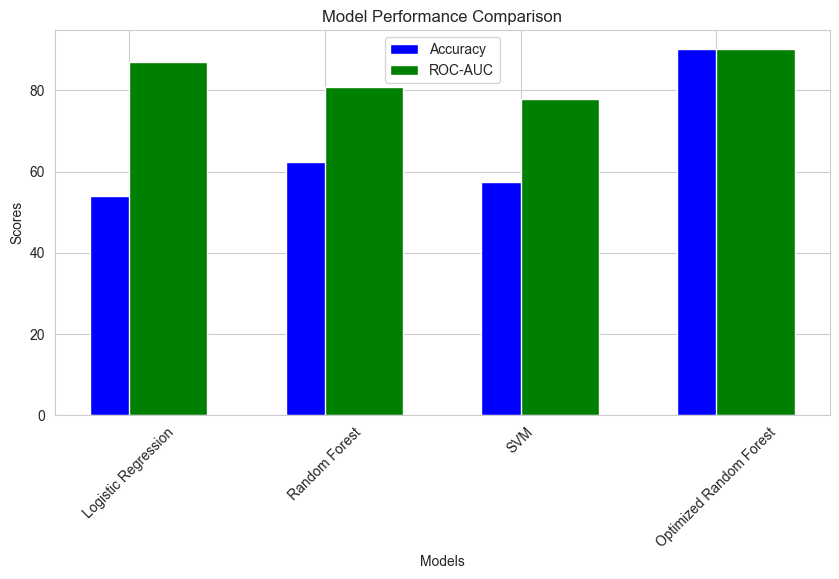

In [7]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'SVM', 'Optimized Random Forest']
accuracies = [54.10, 62.30, 57.38, 90.16]
roc_aucs = [0.8702, 0.8087, 0.7791, 0.9030]

x = range(len(models))

plt.figure(figsize=(10, 5))
plt.bar(x, accuracies, width=0.4, label='Accuracy', color='b', align='center')
plt.bar(x, np.array(roc_aucs)*100, width=0.4, label='ROC-AUC', color='g', align='edge')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.show()


## Insights and Discussion

* The initial analysis with Logistic Regression, Random Forest, and SVM highlighted the challenge of achieving high accuracy in predicting heart disease presence. Each model demonstrated varying strengths, with Random Forest initially showing promise in accuracy and ROC-AUC scores.

* The optimized Random Forest model significantly outperformed the initial models, achieving an accuracy of over 90% and an excellent ROC-AUC score. This underscores the value of hyperparameter tuning in enhancing model performance.

* Random Forest provides insights into feature importance, offering a valuable opportunity to understand which factors are most predictive of heart disease. Future work could delve deeper into these insights, potentially aiding in clinical decision-making.

* The high performance of the optimized Random Forest model suggests potential for application in a clinical setting, where early detection of heart disease can substantially impact patient outcomes. However, deployment would require thorough validation and ethical considerations, particularly regarding false positives and negatives.

* This project opens avenues for further research, including exploring more advanced algorithms, incorporating larger and more diverse datasets, and developing tools that could integrate these models for use in healthcare settings.

In conclusion, this project demonstrates the potential of machine learning models to aid in the early detection of heart disease, highlighting the importance of model selection, optimization, and the need for a careful approach to deployment in clinical settings.